# Kaggle: Santander Transactions

## 1. Load libraries

In [1]:
import torch
import torchvision

import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
from torchvision import transforms
import torch.optim as optim

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

## Explore the data

In [2]:
# Load training data
training_df = pd.read_csv("./data/train.csv")
training_df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [3]:
# Load test data
test_df = pd.read_csv("./data/test.csv")
test_df

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122


In [4]:
unique_labels_counts = training_df["target"].value_counts()

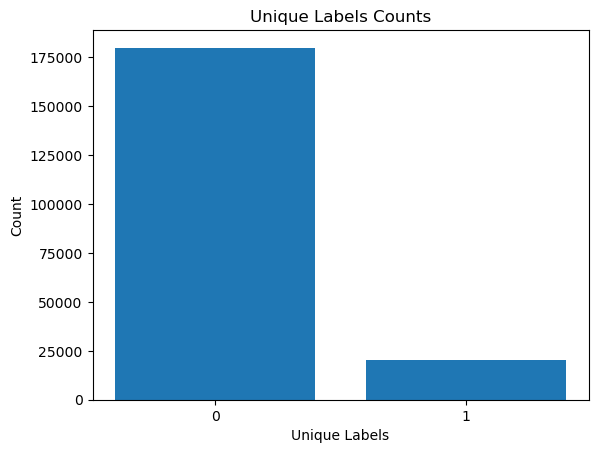

In [5]:
# Plot a bar chart
plt.bar(unique_labels_counts.index, unique_labels_counts.values)

# Add labels and title
plt.xlabel('Unique Labels')
plt.ylabel('Count')
plt.title('Unique Labels Counts')
plt.xticks(unique_labels_counts.index)

# Display the plot
plt.show()

## 3. Dataloader for PyTorch

In [6]:
features = torch.tensor(training_df.drop(['ID_code', 'target'], axis=1).values.astype(np.float32))
features.shape

torch.Size([200000, 200])

In [7]:
targets = torch.tensor(training_df['target'].values.astype(np.float32))
targets.shape

torch.Size([200000])

In [8]:
# separate training and validation sets 
full_dataset = TensorDataset(features, targets) # training + validation
train_size = int(0.8 * len(full_dataset))
valid_size = len(full_dataset) - train_size
train_dataset, valid_dataset = random_split(full_dataset, [train_size, valid_size])
print(f"Length of training dataset: {len(train_dataset)}")
print(f"Length of validation dataset: {len(valid_dataset)}")

Length of training dataset: 160000
Length of validation dataset: 40000


In [9]:
# Defining iterative dataloaders 
batch_size = 100

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size, shuffle=False)
valid_loader = DataLoader(dataset=valid_dataset,
                          batch_size=batch_size, shuffle=False)


In [13]:
for X, y in train_loader:
    print(f"X: {X.shape} {X.dtype}")
    print(f"y: {y.shape} {y.dtype}")
    break
    
for X, y in valid_loader:
    print(f"X: {X.shape} {X.dtype}")
    print(f"y: {y.shape} {y.dtype}")
    break

X: torch.Size([100, 200]) torch.float32
y: torch.Size([100]) torch.float32
X: torch.Size([100, 200]) torch.float32
y: torch.Size([100]) torch.float32


In [11]:
# get some random training data
dataiter = iter(train_loader)
data_train_sample, labels = next(dataiter)
print(data_train_sample)
print(labels)

tensor([[ 14.1327,   5.3567,  10.5471,  ...,   8.1123,  20.5240, -22.2536],
        [ 12.4162,   3.1473,   8.7068,  ...,   8.3495,  10.0726, -14.6365],
        [ 11.6447,   2.0400,  16.3237,  ...,   8.4983,  15.7960, -19.2201],
        ...,
        [ 13.5638,   1.8844,  11.7489,  ...,   9.0411,  13.1118,   4.6944],
        [ 10.9136,   7.9701,  14.2178,  ...,   8.4909,  17.6910, -13.1279],
        [ 14.1695,  -2.8283,   7.8521,  ...,  10.2321,  18.5228,  12.3437]])
tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])


In [12]:
# get some random validation data
dataiter_valid = iter(valid_loader)
data_valid_sample, labels_valid = next(dataiter_valid)
print(data_valid_sample)
print(labels_valid)

tensor([[ 13.0732,  -4.5899,  10.3935,  ...,   7.3695,  20.4647, -18.9129],
        [  8.9159,   0.8037,   8.7351,  ...,   8.0952,  16.9851,   7.5017],
        [  8.6418,  -0.1094,   9.6703,  ...,   9.5642,  15.0507,   4.1734],
        ...,
        [ 10.9999,   1.5915,  10.7826,  ...,   8.4467,  14.1102,   2.9067],
        [ 15.5332,  -0.0817,   8.8194,  ...,   7.8560,  17.8896, -19.5310],
        [ 12.2549,  -3.9487,   8.7020,  ...,   9.9249,  16.8977,  12.6092]])
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 1., 0.])


## 4. Network Structure

In [89]:
class Net(nn.Module):    
    def __init__(self, input_size, class_size):
        super(Net, self).__init__()
          
        self.classifier = nn.Sequential(
            nn.Dropout(p = 0.5),
            nn.Linear(input_size, 200),
            nn.ReLU(inplace=True),
            nn.Dropout(p = 0.5),
            nn.Linear(200, 200),
            nn.ReLU(inplace=True),
            nn.Dropout(p = 0.5),
            nn.Linear(200, class_size),
            nn.Sigmoid() #output layer activation,
        )
          
        for m in self.classifier.children():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform(m.weight)
            elif isinstance(m, nn.BatchNorm1d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
                
    def forward(self, x):
        x = self.classifier(x)
        
        return x     

In [52]:
class Net(nn.Module):
    def __init__(self, input_size, class_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 16) # Fully connected layer
        self.fc2 = nn.Linear(16, class_size) # 1 output - binary class

    def forward(self, x):
        # Activation function for the hidden layer
        x = torch.relu(self.fc1(x))
        # Activation function for the output layer
        x = torch.sigmoid(self.fc2(x))
        return x

In [90]:
# Define the model details
input_size = features.shape[1] # number of features
class_size = 1 # two classes: 0 and 1

# Define the model
model = Net(input_size, class_size)

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.003) 

# Define the loss function
criterion = nn.BCELoss()

#exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()

/var/folders/_r/625gcwy16mqds803054mbq_00000gn/T/ipykernel_62433/2290586962.py:19: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(m.weight)


In [91]:
for child in model.children():
    print(child)

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=200, out_features=200, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=200, out_features=200, bias=True)
  (5): ReLU(inplace=True)
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=200, out_features=1, bias=True)
  (8): Sigmoid()
)


## 5. Training and Evaluation

In [92]:
def train(epoch, total_epochs, all_losses):
    model.train()  # set the model to the train mode
    epoch_loss = 0.0  # for computing the average loss over the epoch
    total_batches = len(train_loader)

    for batch_idx, (data, target) in enumerate(train_loader):
         # get the inputs; [data, target]
        data, target = data, target
        
        
        
        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()
            
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        output = model(data)
        #print(output)

        loss = criterion(output.squeeze(), target)
        
        loss.backward() #backward pass: computes the gradients
        optimizer.step() # update weights
            
        # Accumulate the loss
        epoch_loss += loss.item()

        # Report the loss every few steps
        if batch_idx % 100 == 99:  # Print every 100 mini-batches
            print(f"Epoch [{epoch + 1}/{total_epochs}, Batch {batch_idx + 1}/{total_batches}]")

    average_epoch_loss = epoch_loss / total_batches
    all_losses.append(average_epoch_loss)
    print(f"Average Loss for Epoch {epoch + 1}: {average_epoch_loss:.3f}")

    return all_losses

In [93]:
def to_bin(prob, threshold=0.5):
    return (prob >= threshold).float()

def validation_prediction(valid_loader):
    model.eval() # set the model to the evaluation mode
    valid_pred = torch.LongTensor()
    
    test_loss, correct = 0.0, 0.0
    
    with torch.no_grad():
        for i, (data, target) in enumerate(valid_loader):

            output = model(data)
            test_loss += criterion(output.squeeze(), target) # criterion is the loss function type defined above

            pred = to_bin(output.squeeze())
            target = target.squeeze()
            
            valid_pred = torch.cat((valid_pred, pred), dim=0)
            
            
            correct += (pred == target).sum().item()
                        
    test_loss /= len(valid_loader)
    correct /= len(valid_loader.dataset) # divide it to the number of samples in validation set
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    

Epoch 0
-------------------------------
Epoch [1/3, Batch 100/1600]
Epoch [1/3, Batch 200/1600]
Epoch [1/3, Batch 300/1600]
Epoch [1/3, Batch 400/1600]
Epoch [1/3, Batch 500/1600]
Epoch [1/3, Batch 600/1600]
Epoch [1/3, Batch 700/1600]
Epoch [1/3, Batch 800/1600]
Epoch [1/3, Batch 900/1600]
Epoch [1/3, Batch 1000/1600]
Epoch [1/3, Batch 1100/1600]
Epoch [1/3, Batch 1200/1600]
Epoch [1/3, Batch 1300/1600]
Epoch [1/3, Batch 1400/1600]
Epoch [1/3, Batch 1500/1600]
Epoch [1/3, Batch 1600/1600]
Average Loss for Epoch 1: 10.067
Test Error: 
 Accuracy: 89.9%, Avg loss: 10.097500 

Epoch 1
-------------------------------
Epoch [2/3, Batch 100/1600]
Epoch [2/3, Batch 200/1600]
Epoch [2/3, Batch 300/1600]
Epoch [2/3, Batch 400/1600]
Epoch [2/3, Batch 500/1600]
Epoch [2/3, Batch 600/1600]
Epoch [2/3, Batch 700/1600]
Epoch [2/3, Batch 800/1600]
Epoch [2/3, Batch 900/1600]
Epoch [2/3, Batch 1000/1600]
Epoch [2/3, Batch 1100/1600]
Epoch [2/3, Batch 1200/1600]
Epoch [2/3, Batch 1300/1600]
Epoch [2/3,

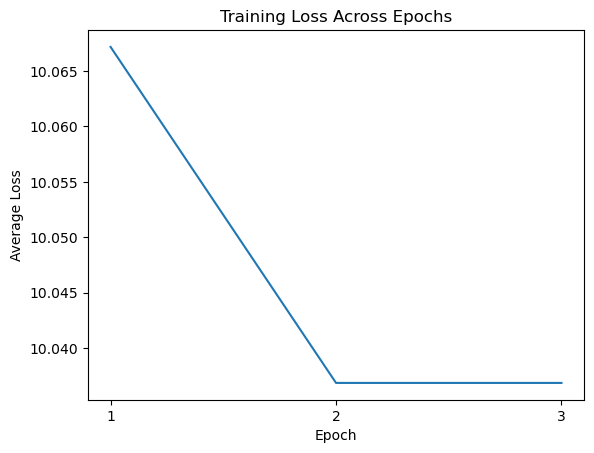

In [94]:
# Number of epochs
total_epochs = 3
all_losses = [] # this keeps tracks of the average loss in each epoch. it starts with an empty list but is given to
# the train function iteratively so that it can add average losses. 

for epoch in range(total_epochs):
    print(f"Epoch {epoch}\n-------------------------------")
    all_losses = train(epoch, total_epochs, all_losses)
    validation_prediction(valid_loader)
    
        
#print(all_losses)
# Plot the loss across epochs

epoch_list = range(1,len(all_losses)+1)
plt.plot(epoch_list, all_losses)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss Across Epochs')
plt.xticks(epoch_list)
plt.show()

## 6. Prediction on the test set

In [95]:
test_df = pd.read_csv('./data/test.csv')
test_df

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122


In [97]:
test_features = torch.tensor(test_df.drop(['ID_code'], axis=1).values.astype(np.float32))
test_features.shape

torch.Size([200000, 200])

In [106]:
# Defining iterative dataloaders 
batch_size = 100

test_loader = DataLoader(dataset=test_features,
                          batch_size=batch_size, shuffle=False)
for X in test_loader:
    print(f"X: {X.shape} {X.dtype}")
    break

X: torch.Size([100, 200]) torch.float32


In [112]:
def prediction(test_loader):
    model.eval() # set the model to the evaluation mode
    test_pred = torch.LongTensor()
    
    with torch.no_grad():
        for i, data in enumerate(test_loader):        
            pred = model(data)
            test_pred = torch.cat((test_pred, pred), dim=0)
        
    return test_pred

In [125]:
test_pred = prediction(test_loader)

In [126]:
test_pred.size()

torch.Size([200000, 1])

In [141]:
pd.DataFrame(np.array(test_df["ID_code"]))

,0
0,test_0
1,test_1
2,test_2
3,test_3
4,test_4
...,...
199995,test_199995
199996,test_199996
199997,test_199997
199998,test_199998


### Output formatting for updating to Kaggle

In [144]:
out_df = pd.DataFrame(np.concatenate((np.arange(1,len(test_pred)+1)[:,None], test_pred.numpy()), axis=1),
                      columns=["ID_code", "target"])
out_df["ID_code"] = pd.DataFrame(np.array(test_df["ID_code"]))

In [145]:
out_df

,ID_code,target
0,test_0,0.0
1,test_1,0.0
2,test_2,0.0
3,test_3,0.0
4,test_4,0.0
...,...,...
199995,test_199995,0.0
199996,test_199996,0.0
199997,test_199997,0.0
199998,test_199998,0.0


In [146]:
# Save
out_df.to_csv('submission.csv', index=False)